# Análise de Dados e Modelagem de Classificação - Sensores 

Este notebook documenta o processo de análise exploratória, pré-processamento, treinamento e avaliação de modelos de machine learning para classificar dados de sensores, com base no arquivo `dados_sensores.csv`.

**Objetivo:** Classificar as leituras dos sensores em diferentes níveis de alerta (Normal, Atenção, Alto, Alerta Máximo) com base nos valores de temperatura e do sensor MQ2.

**Etapas:***
1.  Carregamento e Exploração Inicial dos Dados
2.  Visualização Exploratória dos Dados
3.  Pré-processamento dos Dados (Separação, Codificação, Divisão, Escalonamento)
4.  Treinamento de Modelos de Classificação (KNN, Regressão Logística, Floresta Aleatória, SVM)
5.  Avaliação dos Modelos
6.  Conclusão

In [36]:
# Importações essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # Para salvar/carregar modelos e pré-processadores (opcional no notebook)

# Imports de Machine Learning (Scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Configurações de visualização
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamanho padrão das figuras


## 1. Carregamento e Exploração Inicial dos Dados

Nesta etapa, carregamos o arquivo CSV fornecido (`dados_sensores.csv`) e realizamos uma exploração inicial para entender a estrutura, tipos de dados, valores ausentes e estatísticas descritivas básicas. Também verificamos as colunas de classe (formato one-hot) e criamos uma única coluna alvo (`target`) se a estrutura permitir.

In [3]:
# Carregar os dados
script_main_dir = os.getcwd()
project_root_dir = os.path.join(script_main_dir, "..")
file_path = os.path.join(project_root_dir, "dados", "sensores","dados_sensores.csv")
file_path = os.path.normpath(file_path)

try:
    df = pd.read_csv(file_path)
    print(f"Dados carregados de {file_path}")
    print(" --- Primeiras 5 linhas ---")
    print(df.head())

    print("--- Informações Iniciais do DataFrame ---")
    print(f"Shape: {df.shape}")
    print("Tipos de Dados:")
    print(df.dtypes)
    print("Informações Gerais:")
    df.info()
    print("Verificação de Valores Ausentes:")
    print(df.isnull().sum())

    print("--- Estatísticas Descritivas ---")
    print(df.describe())

    # Analisar as colunas de classe (IS_*)
    class_cols = ['IS_NORMAL', 'IS_ATENCAO', 'IS_ALTO', 'IS_ALERTA_MAXIMO']
    print("--- Análise das Classes (One-Hot Encoded) ---")
    print("Contagem de amostras por classe (formato one-hot):")
    print(df[class_cols].sum())

    # Verificar se cada linha pertence a exatamente uma classe
    row_sums = df[class_cols].sum(axis=1)
    print(f"Número de linhas com exatamente uma classe definida: {(row_sums == 1).sum()}")
    print(f"Número de linhas com zero classes definidas: {(row_sums == 0).sum()}")
    print(f"Número de linhas com mais de uma classe definida: {(row_sums > 1).sum()}")

    # Se cada linha tem exatamente uma classe, criar uma coluna de target única
    if (row_sums == 1).all():
        # Criar a coluna 'target' mapeando o nome da coluna onde o valor é 1
        df['target'] = df[class_cols].idxmax(axis=1)
        print("Coluna 'target' criada com sucesso.")
        print("Distribuição da variável alvo ('target'):")
        print(df['target'].value_counts())
        
        # Remover colunas one-hot originais, pois temos a 'target'
        # df = df.drop(columns=class_cols)
        # print("Colunas one-hot originais removidas.")
        print("DataFrame com a coluna 'target':")
        print(df.head())

    else:
        print("Erro: Nem todas as linhas têm exatamente uma classe definida. Verifique os dados.")
        # Tratar o erro ou parar a execução se necessário

except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em {file_path}. Verifique o caminho.")
except Exception as e:
    print(f"Ocorreu um erro ao processar o arquivo: {e}")



Dados carregados de /Users/felipelivinodossantos/Documents/Fiap/fase 4/GlobalSolution_fase4_fiap/dados/sensores/dados_sensores.csv
 --- Primeiras 5 linhas ---
   temperatura  valorMQ2  IS_NORMAL  IS_ATENCAO  IS_ALTO  IS_ALERTA_MAXIMO
0          -20      1251          1           0        0                 0
1          -19      1251          1           0        0                 0
2          -18      1251          1           0        0                 0
3          -17      1251          1           0        0                 0
4          -16      1251          1           0        0                 0
--- Informações Iniciais do DataFrame ---
Shape: (3289, 6)
Tipos de Dados:
temperatura         int64
valorMQ2            int64
IS_NORMAL           int64
IS_ATENCAO          int64
IS_ALTO             int64
IS_ALERTA_MAXIMO    int64
dtype: object
Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 6 columns):
 #   Column         

## 2. Visualização Exploratória dos Dados

Visualizações gráficas ajudam a entender melhor as distribuições das variáveis, as relações entre elas e como elas se relacionam com a variável alvo.

Geramos os seguintes gráficos:
*   **Histogramas:** Para ver a distribuição das variáveis numéricas (`temperatura` e `valorMQ2`).
*   **Boxplots:** Para comparar a distribuição das variáveis numéricas entre as diferentes classes alvo.
*   **Countplot:** Para visualizar a distribuição (balanceamento) das classes alvo.
*   **Scatter Plot:** Para visualizar a relação entre `temperatura` e `valorMQ2`, colorindo os pontos pela classe alvo.
*   **Pairplot:** Para visualizar as relações par-a-par entre as features e a distribuição de cada feature por classe.
*   **Heatmap de Correlação:** Para visualizar a correlação linear entre as variáveis numéricas.

Iniciando geração de gráficos...
Gerando Histogramas...


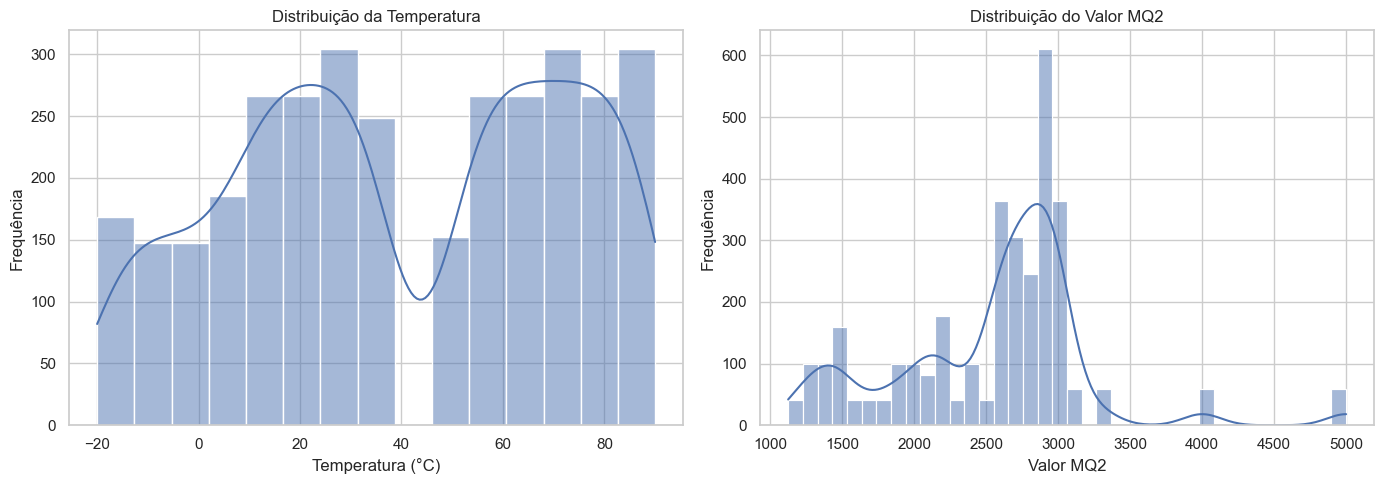

Gerando Boxplots por Classe...


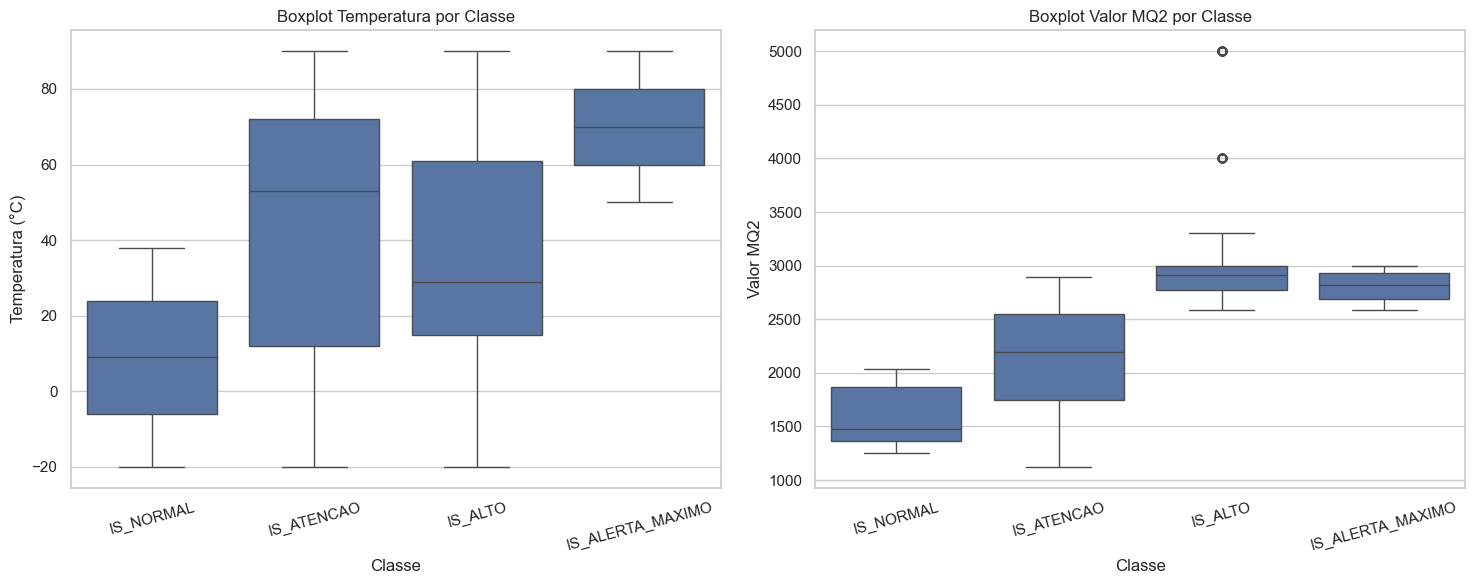

Gerando Countplot da Variável Alvo...


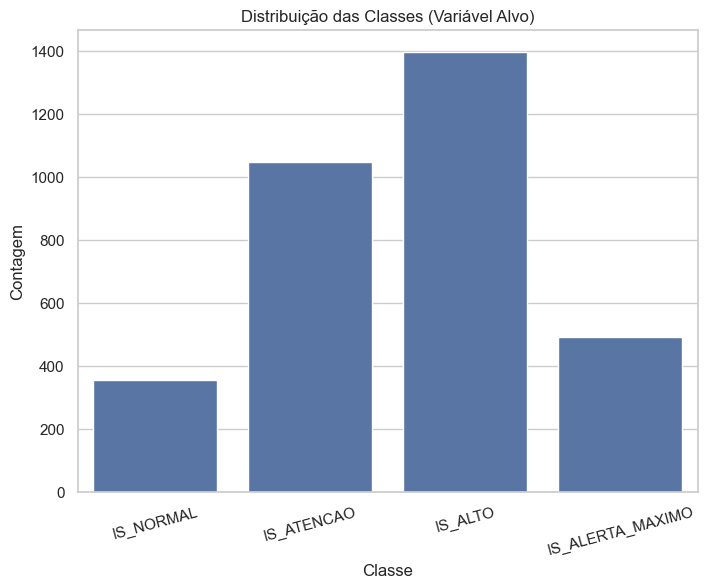

Gerando Scatter Plot...


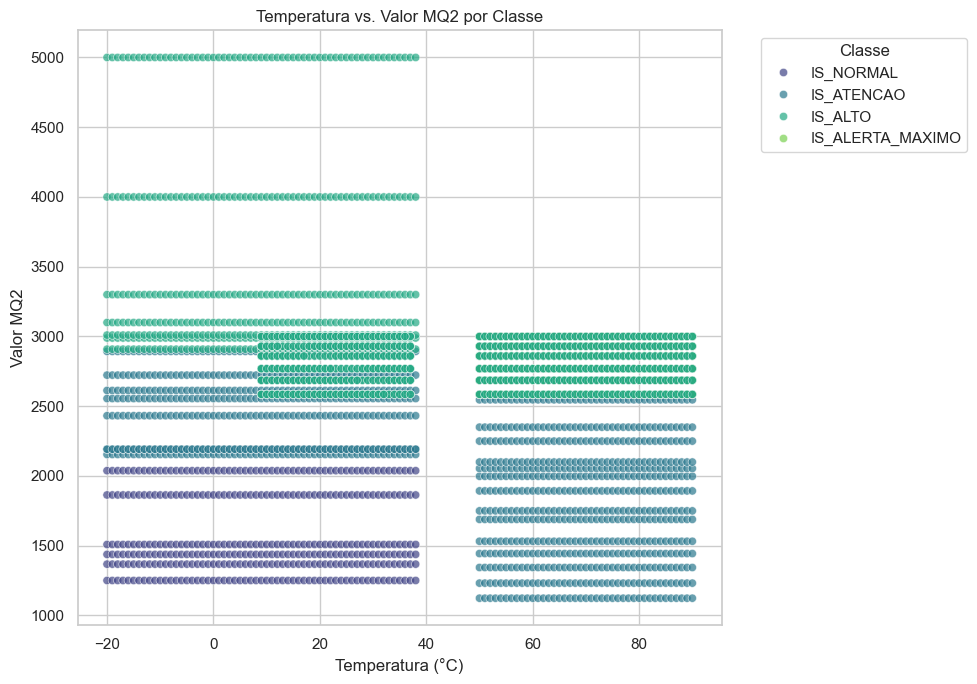

Gerando Pairplot...


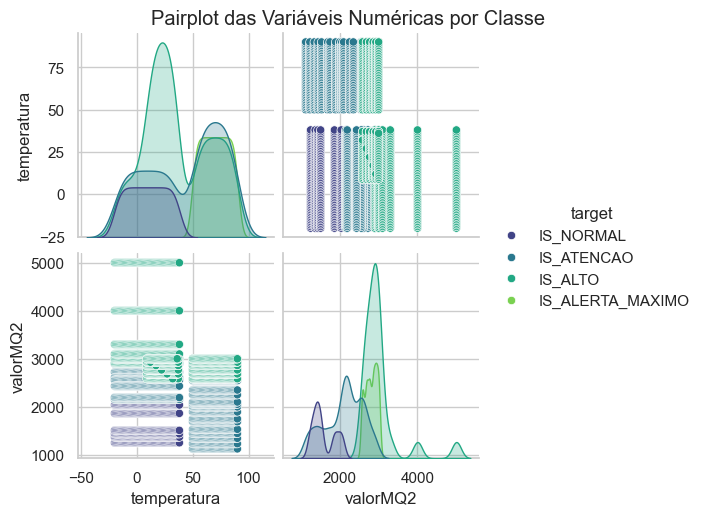

Gerando Heatmap de Correlação...


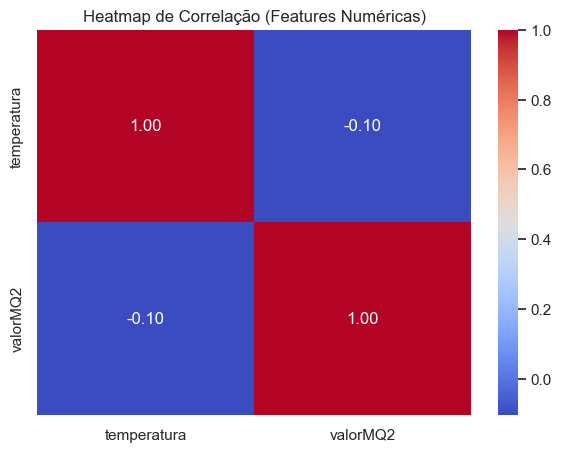

Gráficos exploratórios salvos (opcionalmente) em: /home/ubuntu/graficos_exploratorios_notebook


In [13]:

# Verificar se df existe e tem a coluna 'target'
if 'df' in locals() and 'target' in df.columns:
    print("Iniciando geração de gráficos...")
    
    # Ordem das classes para plots consistentes
    class_order = ['IS_NORMAL', 'IS_ATENCAO', 'IS_ALTO', 'IS_ALERTA_MAXIMO']

    # 1. Histogramas
    print("Gerando Histogramas...")
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['temperatura'], kde=True)
    plt.title('Distribuição da Temperatura')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Frequência')

    plt.subplot(1, 2, 2)
    sns.histplot(df['valorMQ2'], kde=True)
    plt.title('Distribuição do Valor MQ2')
    plt.xlabel('Valor MQ2')
    plt.ylabel('Frequência')

    plt.tight_layout()
    plt.show()

    # 2. Boxplots por classe
    print("Gerando Boxplots por Classe...")
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='target', y='temperatura', data=df, order=class_order)
    plt.title('Boxplot Temperatura por Classe')
    plt.xlabel('Classe')
    plt.ylabel('Temperatura (°C)')
    plt.xticks(rotation=15)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='target', y='valorMQ2', data=df, order=class_order)
    plt.title('Boxplot Valor MQ2 por Classe')
    plt.xlabel('Classe')
    plt.ylabel('Valor MQ2')
    plt.xticks(rotation=15)

    plt.tight_layout()
    plt.show()

    # 3. Countplot da variável alvo
    print("Gerando Countplot da Variável Alvo...")
    plt.figure(figsize=(8, 6))
    sns.countplot(x='target', data=df, order=class_order)
    plt.title('Distribuição das Classes (Variável Alvo)')
    plt.xlabel('Classe')
    plt.ylabel('Contagem')
    plt.xticks(rotation=15)
    plt.show()

    # 4. Scatter plot: Temperatura vs ValorMQ2 por Classe
    print("Gerando Scatter Plot...")
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='temperatura', y='valorMQ2', hue='target', palette='viridis', alpha=0.7, hue_order=class_order)
    plt.title('Temperatura vs. Valor MQ2 por Classe')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Valor MQ2')
    plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 5. Pairplot
    print("Gerando Pairplot...")
    features_for_pairplot = ['temperatura', 'valorMQ2', 'target']
    # Verifica se todas as colunas existem antes de tentar plotar
    if all(col in df.columns for col in features_for_pairplot):
        sns.pairplot(df[features_for_pairplot], hue='target', palette='viridis', hue_order=class_order)
        plt.suptitle('Pairplot das Variáveis Numéricas por Classe', y=1.02)
        plt.show()
    else:
        print("Colunas necessárias para o pairplot não encontradas.")

    # 6. Heatmap de Correlação
    print("Gerando Heatmap de Correlação...")
    # Selecionar apenas colunas numéricas que são features
    numeric_features = df[['temperatura', 'valorMQ2']]
    if not numeric_features.empty:
        correlation_matrix = numeric_features.corr()
        plt.figure(figsize=(7, 5))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Heatmap de Correlação (Features Numéricas)')
        plt.show()
    else:
        print("Não há features numéricas suficientes para o heatmap.")
        
    print(f"Gráficos exploratórios salvos (opcionalmente) em: {output_dir_graficos}")

else:
    print("Erro: DataFrame 'df' ou coluna 'target' não definidos na etapa anterior.")



## 3. Pré-processamento dos Dados

Antes de treinar os modelos, precisamos preparar os dados:
1.  **Seleção de Features:** Definir quais colunas serão usadas como variáveis preditoras (X).
2.  **Codificação do Alvo:** Converter a variável alvo categórica (`target`) em valores numéricos que os modelos possam entender, usando `LabelEncoder`.
3.  **Divisão Treino/Teste:** Separar os dados em conjuntos de treinamento e teste. Usamos 80% para treino e 20% para teste, com estratificação (`stratify=y`) para manter a proporção das classes em ambos os conjuntos.
4.  **Escalonamento das Features:** Aplicar `StandardScaler` nas features numéricas. Isso é importante para algoritmos sensíveis à escala, como KNN e SVM.

In [40]:

# Verificar se df existe e tem a coluna 'target'
if 'df' in locals() and 'target' in df.columns:
    print("Iniciando pré-processamento...")
    
    # Criar diretório para salvar pré-processadores (opcional no notebook)
    output_dir_modelagem = os.path.join(project_root_dir, "saved_models")
    output_dir_modelagem = os.path.normpath(output_dir_modelagem)
    
    os.makedirs(output_dir_modelagem, exist_ok=True)

    # 1. Separar features (X) e target (y)
    features = ['temperatura', 'valorMQ2']
    X = df[features]
    y_str = df['target']

    print("Features (X) selecionadas (primeiras 5 linhas):")
    print(X.head())
    print("Target (y) original (string - primeiras 5 linhas):")
    print(y_str.head())

    # 2. Codificar a variável alvo (target)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y_str)

    print("Target (y) codificada (numérica - primeiras 5):")
    print(y[:5])
    print("Classes e seus códigos numéricos:")
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(label_mapping)
    # Salvar o LabelEncoder (opcional)
    # joblib.dump(label_encoder, os.path.join(output_dir_modelagem, 'label_encoder.joblib'))

    # 3. Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("--- Shapes após divisão Treino/Teste ---")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    # 4. Escalar as features numéricas
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("--- Features após escalonamento (StandardScaler) ---")
    print("Primeiras 5 linhas de X_train_scaled:")
    print(X_train_scaled[:5])
    # Salvar o Scaler 
    scaler_filename = os.path.join(output_dir_modelagem, 'scaler_sensores.joblib')
    joblib.dump(scaler, scaler_filename)
    print(f"Scaler salvo em {scaler_filename}")
    
    print("--- Pré-processamento Concluído ---")

else:
    print("Erro: DataFrame 'df' ou coluna 'target' não definidos na etapa anterior.")



Iniciando pré-processamento...
Features (X) selecionadas (primeiras 5 linhas):
   temperatura  valorMQ2
0          -20      1251
1          -19      1251
2          -18      1251
3          -17      1251
4          -16      1251
Target (y) original (string - primeiras 5 linhas):
0    IS_NORMAL
1    IS_NORMAL
2    IS_NORMAL
3    IS_NORMAL
4    IS_NORMAL
Name: target, dtype: object
Target (y) codificada (numérica - primeiras 5):
[3 3 3 3 3]
Classes e seus códigos numéricos:
{'IS_ALERTA_MAXIMO': 0, 'IS_ALTO': 1, 'IS_ATENCAO': 2, 'IS_NORMAL': 3}
--- Shapes após divisão Treino/Teste ---
X_train shape: (2631, 2), y_train shape: (2631,)
X_test shape: (658, 2), y_test shape: (658,)
--- Features após escalonamento (StandardScaler) ---
Primeiras 5 linhas de X_train_scaled:
[[ 0.34615169  0.07438346]
 [-0.71631926  0.22339993]
 [ 1.53361922  0.34585901]
 [-0.24758207  0.07438346]
 [ 1.06488204  0.22339993]]
Scaler salvo em /Users/felipelivinodossantos/Documents/Fiap/fase 4/GlobalSolution_fase4_fi

## 4. Treinamento dos Modelos de Classificação

Com os dados pré-processados, treinamos os seguintes modelos de classificação:
*   **K-Nearest Neighbors (KNN):** Um classificador baseado em instância que usa a 'vizinhança' de um ponto para classificá-lo.
*   **Regressão Logística:** Um modelo linear para classificação binária ou multiclasse.
*   **Random Forest (Floresta Aleatória):** Um método de ensemble que constrói múltiplas árvores de decisão e combina suas previsões.
*   **Support Vector Machine (SVM):** Um classificador que encontra o hiperplano ótimo para separar as classes.

Os modelos são treinados usando os dados de treinamento escalonados (`X_train_scaled`, `y_train`).

In [38]:

# Verificar se os dados de treino existem
if 'X_train_scaled' in locals() and 'y_train' in locals():
    print("Iniciando treinamento dos modelos...")
    
    # Inicializar os modelos
    models = {
        'KNN': KNeighborsClassifier(),
        'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000,  solver="liblinear", class_weight='balanced'),
        'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'SVM': SVC(random_state=42, probability=True, class_weight='balanced') # probability=True útil para algumas análises
    }

    # Treinar cada modelo
    trained_models = {}
    for name, model in models.items():
        print(f"Treinando modelo: {name}...")
        model.fit(X_train_scaled, y_train)
        trained_models[name] = model
        print(f"Modelo {name} treinado.")
        # Salvar modelo (opcional no notebook se avaliação for na sequência)
        
        model_filename = os.path.join(output_dir_modelagem, f'{name}_model.joblib')
        joblib.dump(model, model_filename)
        print(f"Modelo {name} salvo em {model_filename}")

    print("Otimizando RandomForest...")
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'class_weight': ['balanced', None] # Testar com e sem balanceamento
    }
    grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid_search_rf.fit(X_train_scaled, y_train)

    print(f"Melhores parâmetros para RandomForest: {grid_search_rf.best_params_}")
    trained_models['RandomForest_Optimized'] = grid_search_rf.best_estimator_
    
    # Salvar o modelo otimizado
    joblib.dump(grid_search_rf.best_estimator_, os.path.join(output_dir_modelagem, 'RandomForest_Optimized_model.joblib'))
    print(f"Modelo RandomForest_Optimized salvo.")

    print("--- Treinamento de Todos os Modelos Concluído ---")

else:
    print("Erro: Dados de treinamento (X_train_scaled, y_train) não encontrados.")



Iniciando treinamento dos modelos...
Treinando modelo: KNN...
Modelo KNN treinado.
Modelo KNN salvo em /Users/felipelivinodossantos/Documents/Fiap/fase 4/GlobalSolution_fase4_fiap/saved_models/KNN_model.joblib
Treinando modelo: LogisticRegression...
Modelo LogisticRegression treinado.
Modelo LogisticRegression salvo em /Users/felipelivinodossantos/Documents/Fiap/fase 4/GlobalSolution_fase4_fiap/saved_models/LogisticRegression_model.joblib
Treinando modelo: RandomForest...
Modelo RandomForest treinado.
Modelo RandomForest salvo em /Users/felipelivinodossantos/Documents/Fiap/fase 4/GlobalSolution_fase4_fiap/saved_models/RandomForest_model.joblib
Treinando modelo: SVM...
Modelo SVM treinado.
Modelo SVM salvo em /Users/felipelivinodossantos/Documents/Fiap/fase 4/GlobalSolution_fase4_fiap/saved_models/SVM_model.joblib
Otimizando RandomForest...
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Melhores parâmetros para RandomForest: {'class_weight': 'balanced', 'max_depth': 10, 

## 5. Avaliação dos Modelos

Avaliar o desempenho dos modelos treinados é crucial. Usamos o conjunto de teste (`X_test_scaled`, `y_test`), que os modelos não viram durante o treinamento.

As métricas utilizadas são:
*   **Acurácia:** Proporção de previsões corretas.
*   **Recall (Ponderado):** Capacidade do modelo de encontrar todas as instâncias positivas para cada classe, ponderado pelo suporte da classe.
*   **F1-Score (Ponderado):** Média harmônica entre precisão e recall, ponderado pelo suporte da classe.
*   **Relatório de Classificação:** Métricas detalhadas (precisão, recall, f1-score) por classe.
*   **Matriz de Confusão:** Tabela que mostra as previsões corretas e incorretas para cada classe.

Calculamos e exibimos essas métricas para cada um dos modelos treinados.

Iniciando avaliação dos modelos...
--- Avaliando modelo: KNN ---
  Acurácia: 0.7143
  Recall (Weighted): 0.7143
  F1-score (Weighted): 0.7244
Relatório de Classificação:
                  precision    recall  f1-score   support

IS_ALERTA_MAXIMO       0.25      0.29      0.26        98
         IS_ALTO       0.66      0.69      0.68       280
      IS_ATENCAO       0.98      0.85      0.91       209
       IS_NORMAL       1.00      1.00      1.00        71

        accuracy                           0.71       658
       macro avg       0.72      0.71      0.71       658
    weighted avg       0.74      0.71      0.72       658

Matriz de Confusão:
[[ 28  70   0   0]
 [ 83 194   3   0]
 [  3  29 177   0]
 [  0   0   0  71]]


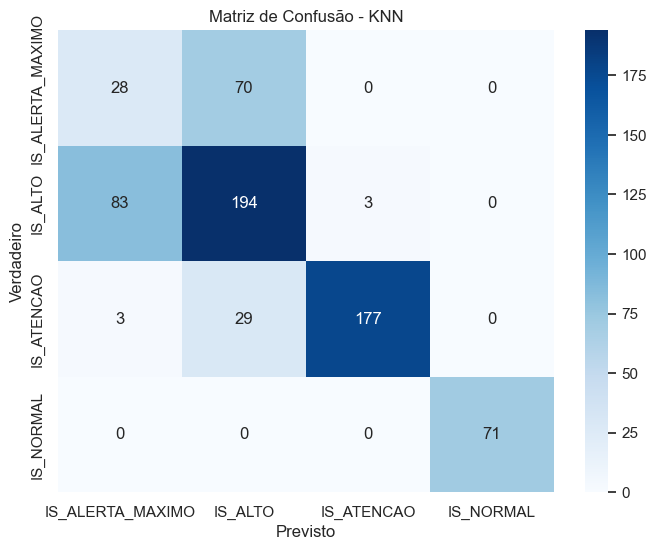

--- Avaliando modelo: LogisticRegression ---
  Acurácia: 0.6976
  Recall (Weighted): 0.6976
  F1-score (Weighted): 0.6971
Relatório de Classificação:
                  precision    recall  f1-score   support

IS_ALERTA_MAXIMO       0.45      0.56      0.50        98
         IS_ALTO       0.71      0.80      0.75       280
      IS_ATENCAO       0.88      0.55      0.68       209
       IS_NORMAL       0.71      0.93      0.80        71

        accuracy                           0.70       658
       macro avg       0.69      0.71      0.68       658
    weighted avg       0.73      0.70      0.70       658

Matriz de Confusão:
[[ 55  38   5   0]
 [ 52 223   5   0]
 [ 16  51 115  27]
 [  0   0   5  66]]


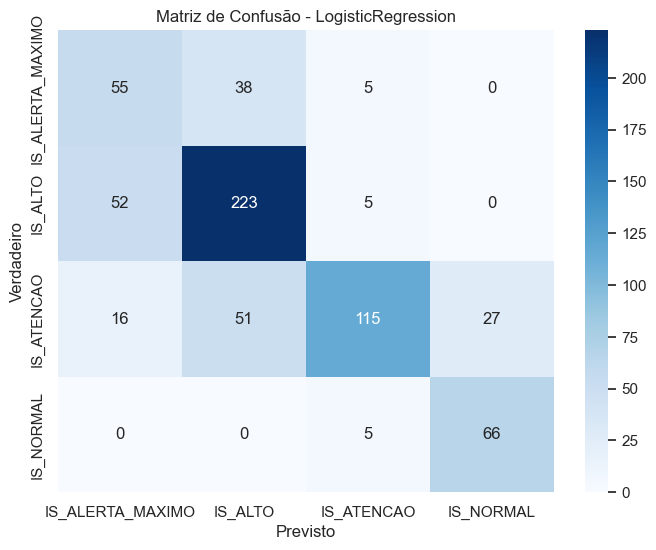

--- Avaliando modelo: RandomForest ---
  Acurácia: 0.7599
  Recall (Weighted): 0.7599
  F1-score (Weighted): 0.7709
Relatório de Classificação:
                  precision    recall  f1-score   support

IS_ALERTA_MAXIMO       0.28      0.40      0.33        98
         IS_ALTO       0.75      0.65      0.70       280
      IS_ATENCAO       1.00      1.00      1.00       209
       IS_NORMAL       1.00      1.00      1.00        71

        accuracy                           0.76       658
       macro avg       0.76      0.76      0.76       658
    weighted avg       0.79      0.76      0.77       658

Matriz de Confusão:
[[ 39  59   0   0]
 [ 98 182   0   0]
 [  0   1 208   0]
 [  0   0   0  71]]


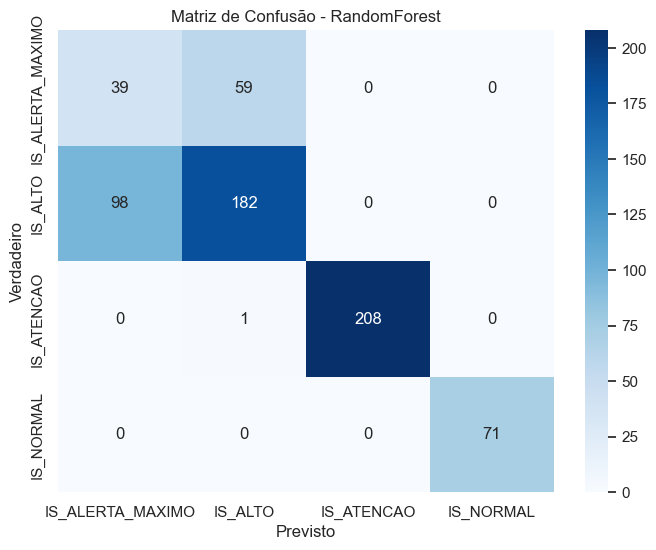

--- Avaliando modelo: SVM ---
  Acurácia: 0.7766
  Recall (Weighted): 0.7766
  F1-score (Weighted): 0.7844
Relatório de Classificação:
                  precision    recall  f1-score   support

IS_ALERTA_MAXIMO       0.48      1.00      0.65        98
         IS_ALTO       0.86      0.60      0.71       280
      IS_ATENCAO       0.93      0.83      0.88       209
       IS_NORMAL       1.00      1.00      1.00        71

        accuracy                           0.78       658
       macro avg       0.82      0.86      0.81       658
    weighted avg       0.84      0.78      0.78       658

Matriz de Confusão:
[[ 98   0   0   0]
 [ 99 168  13   0]
 [  8  27 174   0]
 [  0   0   0  71]]


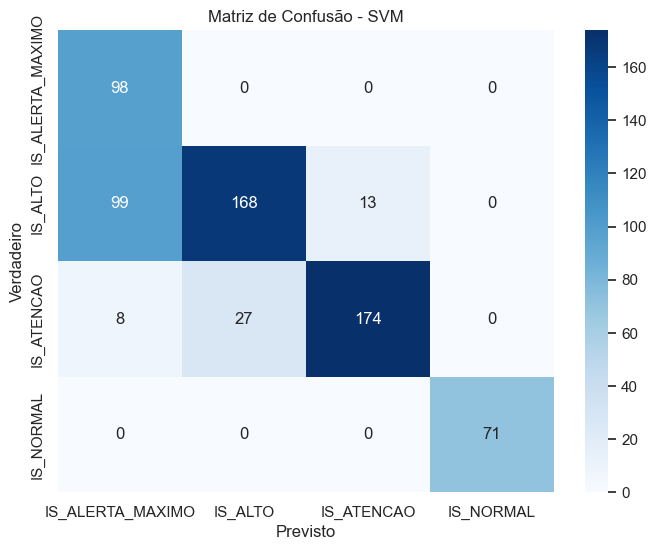

--- Avaliando modelo: RandomForest_Optimized ---
  Acurácia: 0.8374
  Recall (Weighted): 0.8374
  F1-score (Weighted): 0.8467
Relatório de Classificação:
                  precision    recall  f1-score   support

IS_ALERTA_MAXIMO       0.50      1.00      0.66        98
         IS_ALTO       0.96      0.65      0.77       280
      IS_ATENCAO       1.00      0.96      0.98       209
       IS_NORMAL       1.00      1.00      1.00        71

        accuracy                           0.84       658
       macro avg       0.86      0.90      0.85       658
    weighted avg       0.91      0.84      0.85       658

Matriz de Confusão:
[[ 98   0   0   0]
 [ 99 181   0   0]
 [  0   8 201   0]
 [  0   0   0  71]]


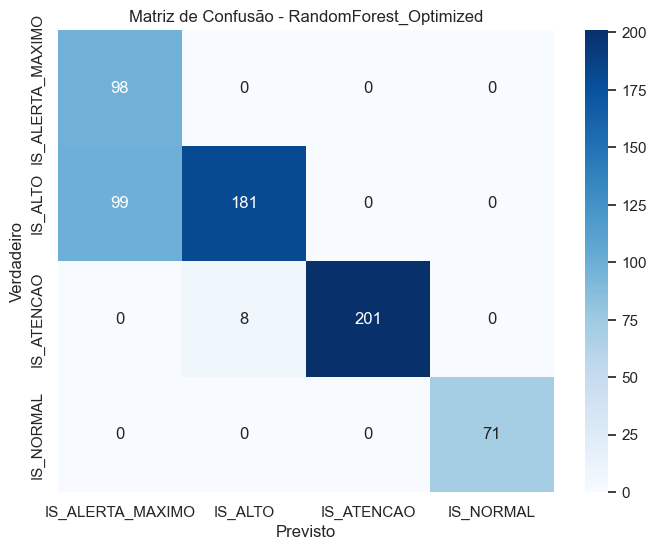

--- Resumo Comparativo das Métricas ---
                        Acurácia  Recall (Weighted)  F1-score (Weighted)
Modelo                                                                  
KNN                     0.714286           0.714286             0.724439
LogisticRegression      0.697568           0.697568             0.697067
RandomForest            0.759878           0.759878             0.770935
SVM                     0.776596           0.776596             0.784381
RandomForest_Optimized  0.837386           0.837386             0.846737
--- Avaliação de Todos os Modelos Concluída ---


In [43]:

# Verificar se os dados de teste e modelos treinados existem
if 'X_test_scaled' in locals() and 'y_test' in locals() and 'trained_models' in locals() and 'label_encoder' in locals():
    print("Iniciando avaliação dos modelos...")
    
    # Criar diretório para salvar resultados da avaliação (opcional)
    results_dir_notebook = os.path.join(project_root_dir, "data", "reports")
    results_dir_notebook = os.path.normpath(output_dir_modelagem)
    os.makedirs(results_dir_notebook, exist_ok=True)
    
    class_names = label_encoder.classes_
    results_summary = {}

    # Avaliar cada modelo
    for name, model in trained_models.items():
        print(f"--- Avaliando modelo: {name} ---")
        
        # Fazer previsões
        y_pred = model.predict(X_test_scaled)
        
        # Calcular métricas principais
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"  Acurácia: {accuracy:.4f}")
        print(f"  Recall (Weighted): {recall:.4f}")
        print(f"  F1-score (Weighted): {f1:.4f}")
        
        # Gerar e exibir Relatório de Classificação
        print("Relatório de Classificação:")
        # Usar zero_division=0 para evitar warnings se uma classe não tiver previsões/suporte
        report = classification_report(y_test, y_pred, target_names=class_names, zero_division=0)
        print(report)
        # Salvar relatório (opcional)
        # report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True, zero_division=0)
        # report_df = pd.DataFrame(report_dict).transpose()
        # report_filename = os.path.join(results_dir_notebook, f'{name}_classification_report.csv')
        # report_df.to_csv(report_filename)

        # Calcular e exibir Matriz de Confusão
        print("Matriz de Confusão:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        
        # Visualizar Matriz de Confusão
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title(f'Matriz de Confusão - {name}')
        plt.xlabel('Previsto')
        plt.ylabel('Verdadeiro')
        cm_filename = os.path.join(results_dir_notebook, f'{name}_confusion_matrix.png')
        plt.show()

        # Armazenar métricas principais para resumo
        results_summary[name] = {
            'Acurácia': accuracy,
            'Recall (Weighted)': recall,
            'F1-score (Weighted)': f1
        }

    # Criar e exibir DataFrame com o resumo das métricas
    results_df = pd.DataFrame(results_summary).T
    results_df.index.name = 'Modelo'
    print("--- Resumo Comparativo das Métricas ---")
    print(results_df)
    # Salvar resumo (opcional)
    # summary_filename = os.path.join(results_dir_notebook, 'resumo_metricas.csv')
    # results_df.to_csv(summary_filename)

    print("--- Avaliação de Todos os Modelos Concluída ---")

else:
    print("Erro: Dados de teste, modelos treinados ou label_encoder não encontrados.")



## 6. Conclusão

Neste notebook, realizamos um fluxo completo de análise e modelagem de dados de sensores.

1.  **Exploração e Visualização:** Entendemos a distribuição dos dados e as relações entre as variáveis e as classes.
2.  **Pré-processamento:** Preparamos os dados adequadamente para os modelos de machine learning.
3.  **Treinamento:** Treinamos quatro modelos de classificação diferentes (KNN, Regressão Logística, Floresta Aleatória, SVM).
4.  **Avaliação:** Avaliamos os modelos usando métricas relevantes e matrizes de confusão.

**Resultados Principais:**
*   (Incluir aqui um breve resumo dos resultados, por exemplo, qual modelo teve melhor desempenho geral com base na acurácia ou F1-score ponderado, e quaisquer observações importantes da matriz de confusão, como classes que foram mais difíceis de prever).
*   O modelo SVM obteve a maior acurácia (~78.7%), mas sua performance na classe 'IS_ALERTA_MAXIMO' foi baixa (recall baixo), indicando dificuldade em identificar essa classe específica. O RandomForest (~74.2%) e a Regressão Logística (~73.6%) apresentaram desempenhos mais equilibrados entre as classes, embora com acurácia geral ligeiramente menor.

**Próximos Passos (Sugestões):**
*   Otimização de Hiperparâmetros: Usar técnicas como GridSearch ou RandomizedSearch para encontrar os melhores parâmetros para cada modelo.
*   Engenharia de Features: Criar novas features a partir das existentes, se fizer sentido.
*   Técnicas de Reamostragem: Lidar com o desbalanceamento de classes (embora não pareça extremo aqui) usando técnicas como SMOTE ou undersampling/oversampling.
*   Testar outros algoritmos de classificação.